![](../img/330-banner.png)

Lecture 21: Ethics
-------------------

UBC 2022-23 W2

Instructor: Amir Abdi

Office Hours: Mondays 5-6 PM

Anonymous Feedback: https://forms.gle/t21FhAVG8aY2mFs56

<br><br><br><br><br>
### iClicker poll for the last session

Suggested topic based on previous signals from the class
- A) Learn how to train a GPT model
- B) Other

If **B (Other)** got more votes than **A**, we run another poll right away to collect your ideas.

https://join.iclicker.com/EMMJ

###

<br><br><br>
**Some news:**
- [Twitter just made its recommender system open-source](https://github.com/twitter/the-algorithm)
- [Italy banned OpenAI's ChatGPT over privacy concerns](https://www.euronews.com/next/2023/03/31/openais-chatgpt-chatbot-banned-in-italy-by-watchdog-over-privacy-concerns)
- [AI-generated images from text can't be copyrighted, US government rules](https://www.engadget.com/ai-generated-images-from-text-cant-be-copyrighted-us-government-rules-174243933.html)
<br><br><br>

## Imports

In [1]:
import os
import sys

import IPython
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.metrics import ConfusionMatrixDisplay  # Recommended method in sklearn 1.0

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

from IPython.display import Image

<br><br>

## ML fairness activity

<br><br><br><br><br><br><br>
ML Models reflect and amplify the **biases** in data.

We (Humans) are all **biased** one way or another.

Data generated by Human (i.e., internet) is **biased**.

<br><br><br><br><br><br><br>

AI/ML systems can give the illusion of objectivity as they are derived from seemingly unbiased data & algorithm. However, human are inherently biased and AI/ML systems, if not carefully evaluated, can even further amplify the existing inequities and systemic bias in our society.  

How do we make sure our AI/ML systems are *fair*? Which metrics can we use to quatify 'fairness' in AI/ML systems?

Let's examine our old **income < or > 50k** dataset from [the adult census data set](https://www.kaggle.com/uciml/adult-census-income). 

In [2]:
census_df = pd.read_csv("../data/adult.csv")
census_df.shape

(32561, 15)

In [3]:
train_df, test_df = train_test_split(census_df, test_size=0.4, random_state=42)

In [4]:
train_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico,<=50K
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States,<=50K
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
5390,51,Private,146767,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
860,55,Federal-gov,238192,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,>50K
15795,41,Private,154076,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K


------------

**[Same old data cleaning - to be skipped in class]**

In [5]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(19536, 15)

In [6]:
# Let's identify numeric and categorical features

numeric_features = [
    "age",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]

categorical_features = [
    "workclass",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "native.country",
]

ordinal_features = ["education"]
binary_features = [
    "sex"
]  # Not binary in general but in this particular dataset it seems to have only two possible values
drop_features = ["education.num", "fnlwgt"]
target = "income"

In [7]:
train_df["education"].unique()

array(['7th-8th', 'Assoc-voc', 'HS-grad', 'Bachelors', 'Some-college',
       '10th', '11th', 'Prof-school', '12th', '5th-6th', 'Masters',
       'Assoc-acdm', '9th', 'Doctorate', '1st-4th', 'Preschool'],
      dtype=object)

In [8]:
education_levels = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Prof-school",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate",
]

In [9]:
assert set(education_levels) == set(train_df["education"].unique())

In [10]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

numeric_transformer = make_pipeline(StandardScaler())

ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

binary_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(drop="if_binary", dtype=int),
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

In [11]:
X_train = train_df_nan.drop(columns=[target])
y_train = train_df_nan[target]

X_test = test_df_nan.drop(columns=[target])
y_test = test_df_nan[target]

**[end of data cleaning]**

----------------

In [12]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
25823,36,Private,245521,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,Mexico
10274,26,Private,134287,Assoc-voc,11,Never-married,Sales,Own-child,White,Female,0,0,35,United-States
27652,25,Local-gov,109526,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States
13941,23,Private,131275,HS-grad,9,Never-married,Craft-repair,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States
31384,27,Private,193122,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States


In [13]:
y_train.head()

25823    <=50K
10274    <=50K
27652    <=50K
13941    <=50K
31384    <=50K
Name: income, dtype: object

In [14]:
y_train.value_counts()

<=50K    14841
>50K      4695
Name: income, dtype: int64

In [15]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(class_weight="balanced", max_iter=1000)
)

In [16]:
pipe_lr.fit(X_train, y_train);

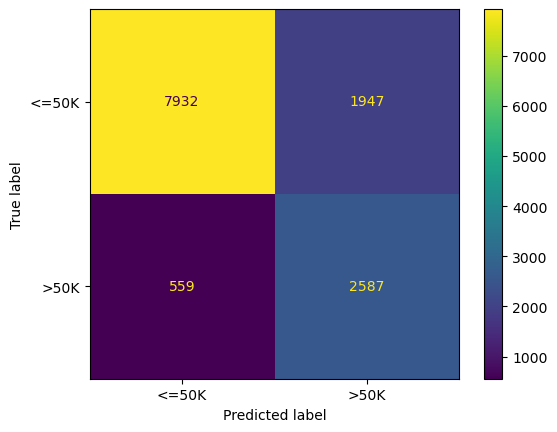

In [17]:
cm = ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test);

In [18]:
pipe_lr.score(X_test, y_test)

0.8076007677543187

On average, across the entire dataset, the results look OK. 
<br><br><br><br><br><br><br>

Now, let's look more closely:

Let's examine confusion matrix separately for the **two genders** we have in the data. 

In [19]:
X_train_enc = preprocessor.fit_transform(X_train)
preprocessor.named_transformers_["pipeline-2"]["onehotencoder"].get_feature_names_out()

array(['x0_Male'], dtype=object)

In [20]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
14160,29,Private,280618,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
27048,19,Private,439779,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,15,United-States
28868,28,Private,204734,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States
5667,35,Private,107991,11th,7,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States
7827,20,Private,54152,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,NaN


In [21]:
X_female = X_test.query("sex=='Female'")  # X where sex is female
X_male = X_test.query("sex=='Male'")  # X where sex is male

y_female = y_test[X_female.index]  # y where sex is female
y_male = y_test[X_male.index]  # y where sex is male

**Get predictions for `X_female` and `y_male` with `pipe_lr`**

In [22]:
female_preds = pipe_lr.predict(X_female)
male_preds = pipe_lr.predict(X_male)

In [23]:
print("Accuracy of model for female: ", pipe_lr.score(X_female, y_female))

Accuracy of model for female:  0.9102920723226704


In [24]:
print("Accuracy of model for male: ", pipe_lr.score(X_male, y_male))

Accuracy of model for male:  0.756744346228906


**The model is performing better for one gender vs. the other!**

<br><br><br><br>

Let's examine the accuracy and confusion matrix for female class.  

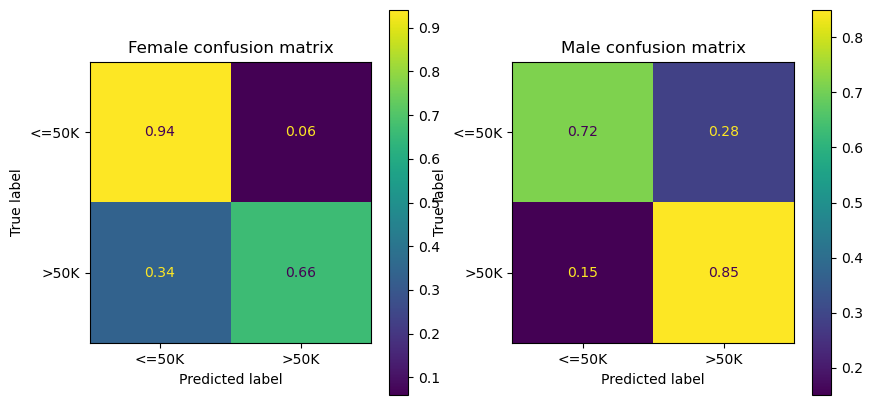

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_female, y_female, ax = ax[0], normalize="true");
ax[0].set_title('Female confusion matrix')
ax[1].set_title('Male confusion matrix')
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_male, y_male, ax = ax[1], normalize="true");

In [26]:
print(classification_report(y_female, female_preds))

              precision    recall  f1-score   support

       <=50K       0.96      0.94      0.95      3851
        >50K       0.57      0.66      0.61       463

    accuracy                           0.91      4314
   macro avg       0.76      0.80      0.78      4314
weighted avg       0.92      0.91      0.91      4314



Let's examine the accuracy and confusion matrix for male class.  

In [27]:
print(classification_report(y_male, male_preds))

              precision    recall  f1-score   support

       <=50K       0.91      0.72      0.80      6028
        >50K       0.57      0.85      0.68      2683

    accuracy                           0.76      8711
   macro avg       0.74      0.78      0.74      8711
weighted avg       0.81      0.76      0.77      8711



### ❓❓ Questions for group discussion

Let's assume that a company is using this classifier for loan approval with a simple rule that if the income is >=50K, approve the loan, else reject the loan. 

Discuss the questions below with your neighbour(s) 

1. What is the **proportion of >50k to <=50k** for each gender?
2. Which gender has a higher accuracy?
3. Which gender has a higher precision for class >50K? 
4. Which gender has a higher recall for class >50K?
5. Will both groups have more or less the same proportion of people with approved loans? 



**Q1: Overall, do you think this income classifier will fairly treat both groups? What will be the consequences of using this classifier in loan approval application?**

Answer: If the loan application is decided solely based on the outcome of this model, it is not fair because being a female plays to your disadvantage.


**Q2. Do you think the effect will still exist if the sex feature is removed from the model (but you still have it available on the side just to repeat the above experience and re-create two confusion matrices)?**

Answer: No, it wouldn't solve it as there might be correlations between Gender (Sex) and other features which the model will pick up on.

**Q3:** Are there any other groups in this dataset worth examining for biases? 

Answer: Think about at home

## Types of Biases

### Historical Bias

Historical bias in machine learning data refers to the phenomenon where the training data used to build a machine learning model reflects the **biases and prejudices that existed in the past**. This means that the patterns learned by the model may be biased towards certain groups or characteristics, and may perpetuate unfair or discriminatory practices.

Historical bias can occur for a number of reasons. For example, if historical data used to train the model reflects biased societal attitudes or practices, the model may learn to replicate those biases. Additionally, if certain groups are underrepresented in the training data, the model may not learn to make accurate predictions for those groups, leading to disparities in outcomes.

To address historical bias in machine learning data, it is important to carefully **select training data that is representative of the population** and to **regularly test and validate fairness of the model across groups**.

<br><br><br>
Example: Google improved their search results for CEO after they received some heat regarding their gender exclusive image serach results.

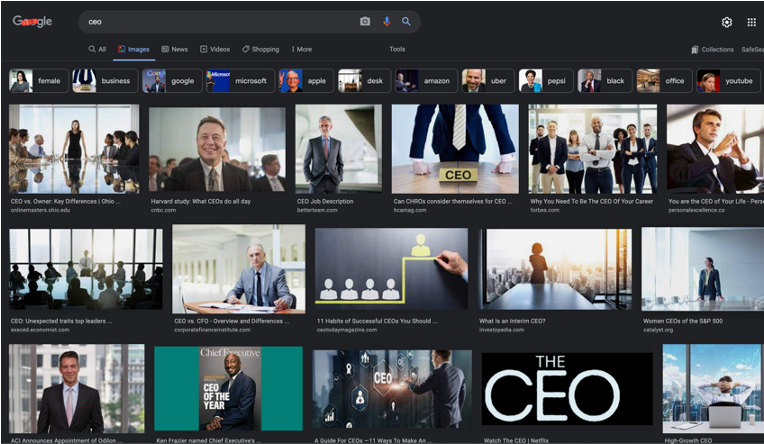

### Measurement Bias

Measurement bias in machine learning data refers to a type of bias that can occur when the **data used to train or test a machine learning model is not accurately measuring the intended variable or concept**. This can lead to inaccurate or misleading predictions and can impact the overall performance of the model.

Measurement bias can occur for a number of reasons. For example, if the measurement tool used to collect the data is not reliable or valid, the data may not accurately reflect the intended variable or concept. Additionally, if the data collection process is biased in some way, such as only collecting data from certain groups or under certain conditions, the resulting data may not be representative of the population.

When choosing and measuring features and labels to use, they are often proxies for desired quantities. These **choices may leave out important factors or introduce group or input-dependent noise** that leads to differential performance.

**3 sources of measurement bias:**

1. Measurement process varies across groups: If a group of people are more stringently monitored, more errors will be observed in that group. e.g. if you allocate more police forces to a certain neighborhood, you get higher crime rate, and it will continnue to have a feedback loop.

2. Quality of data varies across groups: Structural discrimination can lead to systematically higher error rates in a certain group. For example, women are more likely to be misdiagnosed nor not diagnosed for conditions where self-reported pain is a symptom. In this case, "diagnosed with condition X" is biased proxy for "has condition X".

3. The defined [classification] task is an oversimplification: Reducing the decision to a single attribute (e.g. Yes/No) can create a biased proxy label. For example, deciding whether a student will be successful as a binary classification is nonesense as a student's sucess is a spectrum. Even choosing GPA as the proxy for success is incorrect as one's success is  multi-dimensional and cannot be reduced to a single number. Morever, it ignroes the difrerent indicators of success achived by parts of the population.


### Representation Bias

Representation bias in machine learning data refers to the phenomenon where the training data used to build a machine learning model **does not accurately represent the population or phenomenon of interest**. This can lead to inaccurate or biased predictions and can impact the overall performance of the model.

Representation bias can occur for a number of reasons. For example, if the **training data is not diverse enough and only includes certain groups or characteristics**, the model may not learn to make accurate predictions for other groups or characteristics.

One example of representation bias in machine learning data is in the use of **machine learning models for hiring decisions**. If the training data only includes job candidates from certain backgrounds or industries, the resulting model may not be able to accurately predict the performance of candidates **from other backgrounds or industries**. Collecting data via **Surveys** is also another source of Representation bias; if the data is collected in a fashion that the entire target population do not have access to, we will introduce representation bias.

**2 sources of representation bias:**

1. The sampling methods only reach a portion of the population: For example, if we collect data via smartphones, some portions of the population will be under-represented who don't have access to one. 

2. Population of interest has **changed** OR is **different** from the population used during model training:  For example, if we train the model on data from Toronto, it may not be useful for Vancouver. Similarly, data from Vancouver dated 30 years may not be useful for today's Vancouver.

### (Optional)

[To learn more about challenges of Fairness, checkout this slideshow from 2022](https://medium.com/@amirabdi/monitoring-ai-fairness-429857bf6d3)